In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from sklearn import linear_model, datasets, tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
from keras.constraints import maxnorm
from keras.layers import Dense, Dropout, Flatten

In [3]:
# Set the seed value for the notebook so the results are reproducible
from numpy.random import seed
seed(1)

In [4]:
import tensorflow
tensorflow.keras.__version__

'2.4.0'

In [5]:
df = pd.read_csv("Speed Dating Data.csv", encoding="ISO-8859-1")
df

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,1,44,2,21,22,14,10.0,5,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8374,552,22.0,1,44,2,21,22,13,10.0,4,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8375,552,22.0,1,44,2,21,22,19,10.0,10,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8376,552,22.0,1,44,2,21,22,3,10.0,16,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


In [6]:
pd.options.display.max_rows = 4000

In [7]:
df .isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
wave           0
round          0
position       0
positin1    1846
order          0
partner        0
pid           10
match          0
int_corr     158
samerace       0
age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
dec_o          0
attr_o       212
sinc_o       287
intel_o      306
fun_o        360
amb_o        722
shar_o      1076
like_o       250
prob_o       318
met_o        385
age           95
field         63
field_cd      82
undergra    3464
mn_sat      5245
tuition     4795
race          63
imprace       79
imprelig      79
from          79
zipcode     1064
income      4099
goal          79
date          97
go_out        79
career        89
career_c     138
sports        79
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
clubbing      

In [8]:

# Drop the null columns where all values are null

as_Selected = df[['match', 'int_corr','gender','age','race','field_cd', 'age_o', 'race_o','dec_o','attr_o','sinc_o','intel_o','fun_o','amb_o']]

as_Selected

,match,int_corr,gender,age,race,field_cd,age_o,race_o,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o
0,0,0.14,0,21.0,4.0,1.0,27.0,2.0,0,6.0,8.0,8.0,8.0,8.0
1,0,0.54,0,21.0,4.0,1.0,22.0,2.0,0,7.0,8.0,10.0,7.0,7.0
2,1,0.16,0,21.0,4.0,1.0,22.0,4.0,1,10.0,10.0,10.0,10.0,10.0
3,1,0.61,0,21.0,4.0,1.0,23.0,2.0,1,7.0,8.0,9.0,8.0,9.0
4,1,0.21,0,21.0,4.0,1.0,24.0,3.0,1,8.0,7.0,9.0,6.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,0,0.64,1,25.0,2.0,18.0,26.0,3.0,1,10.0,5.0,3.0,2.0,6.0
8374,0,0.71,1,25.0,2.0,18.0,24.0,6.0,0,6.0,3.0,7.0,3.0,7.0
8375,0,-0.46,1,25.0,2.0,18.0,29.0,3.0,0,2.0,1.0,2.0,2.0,2.0
8376,0,0.62,1,25.0,2.0,18.0,22.0,4.0,1,5.0,7.0,5.0,5.0,3.0


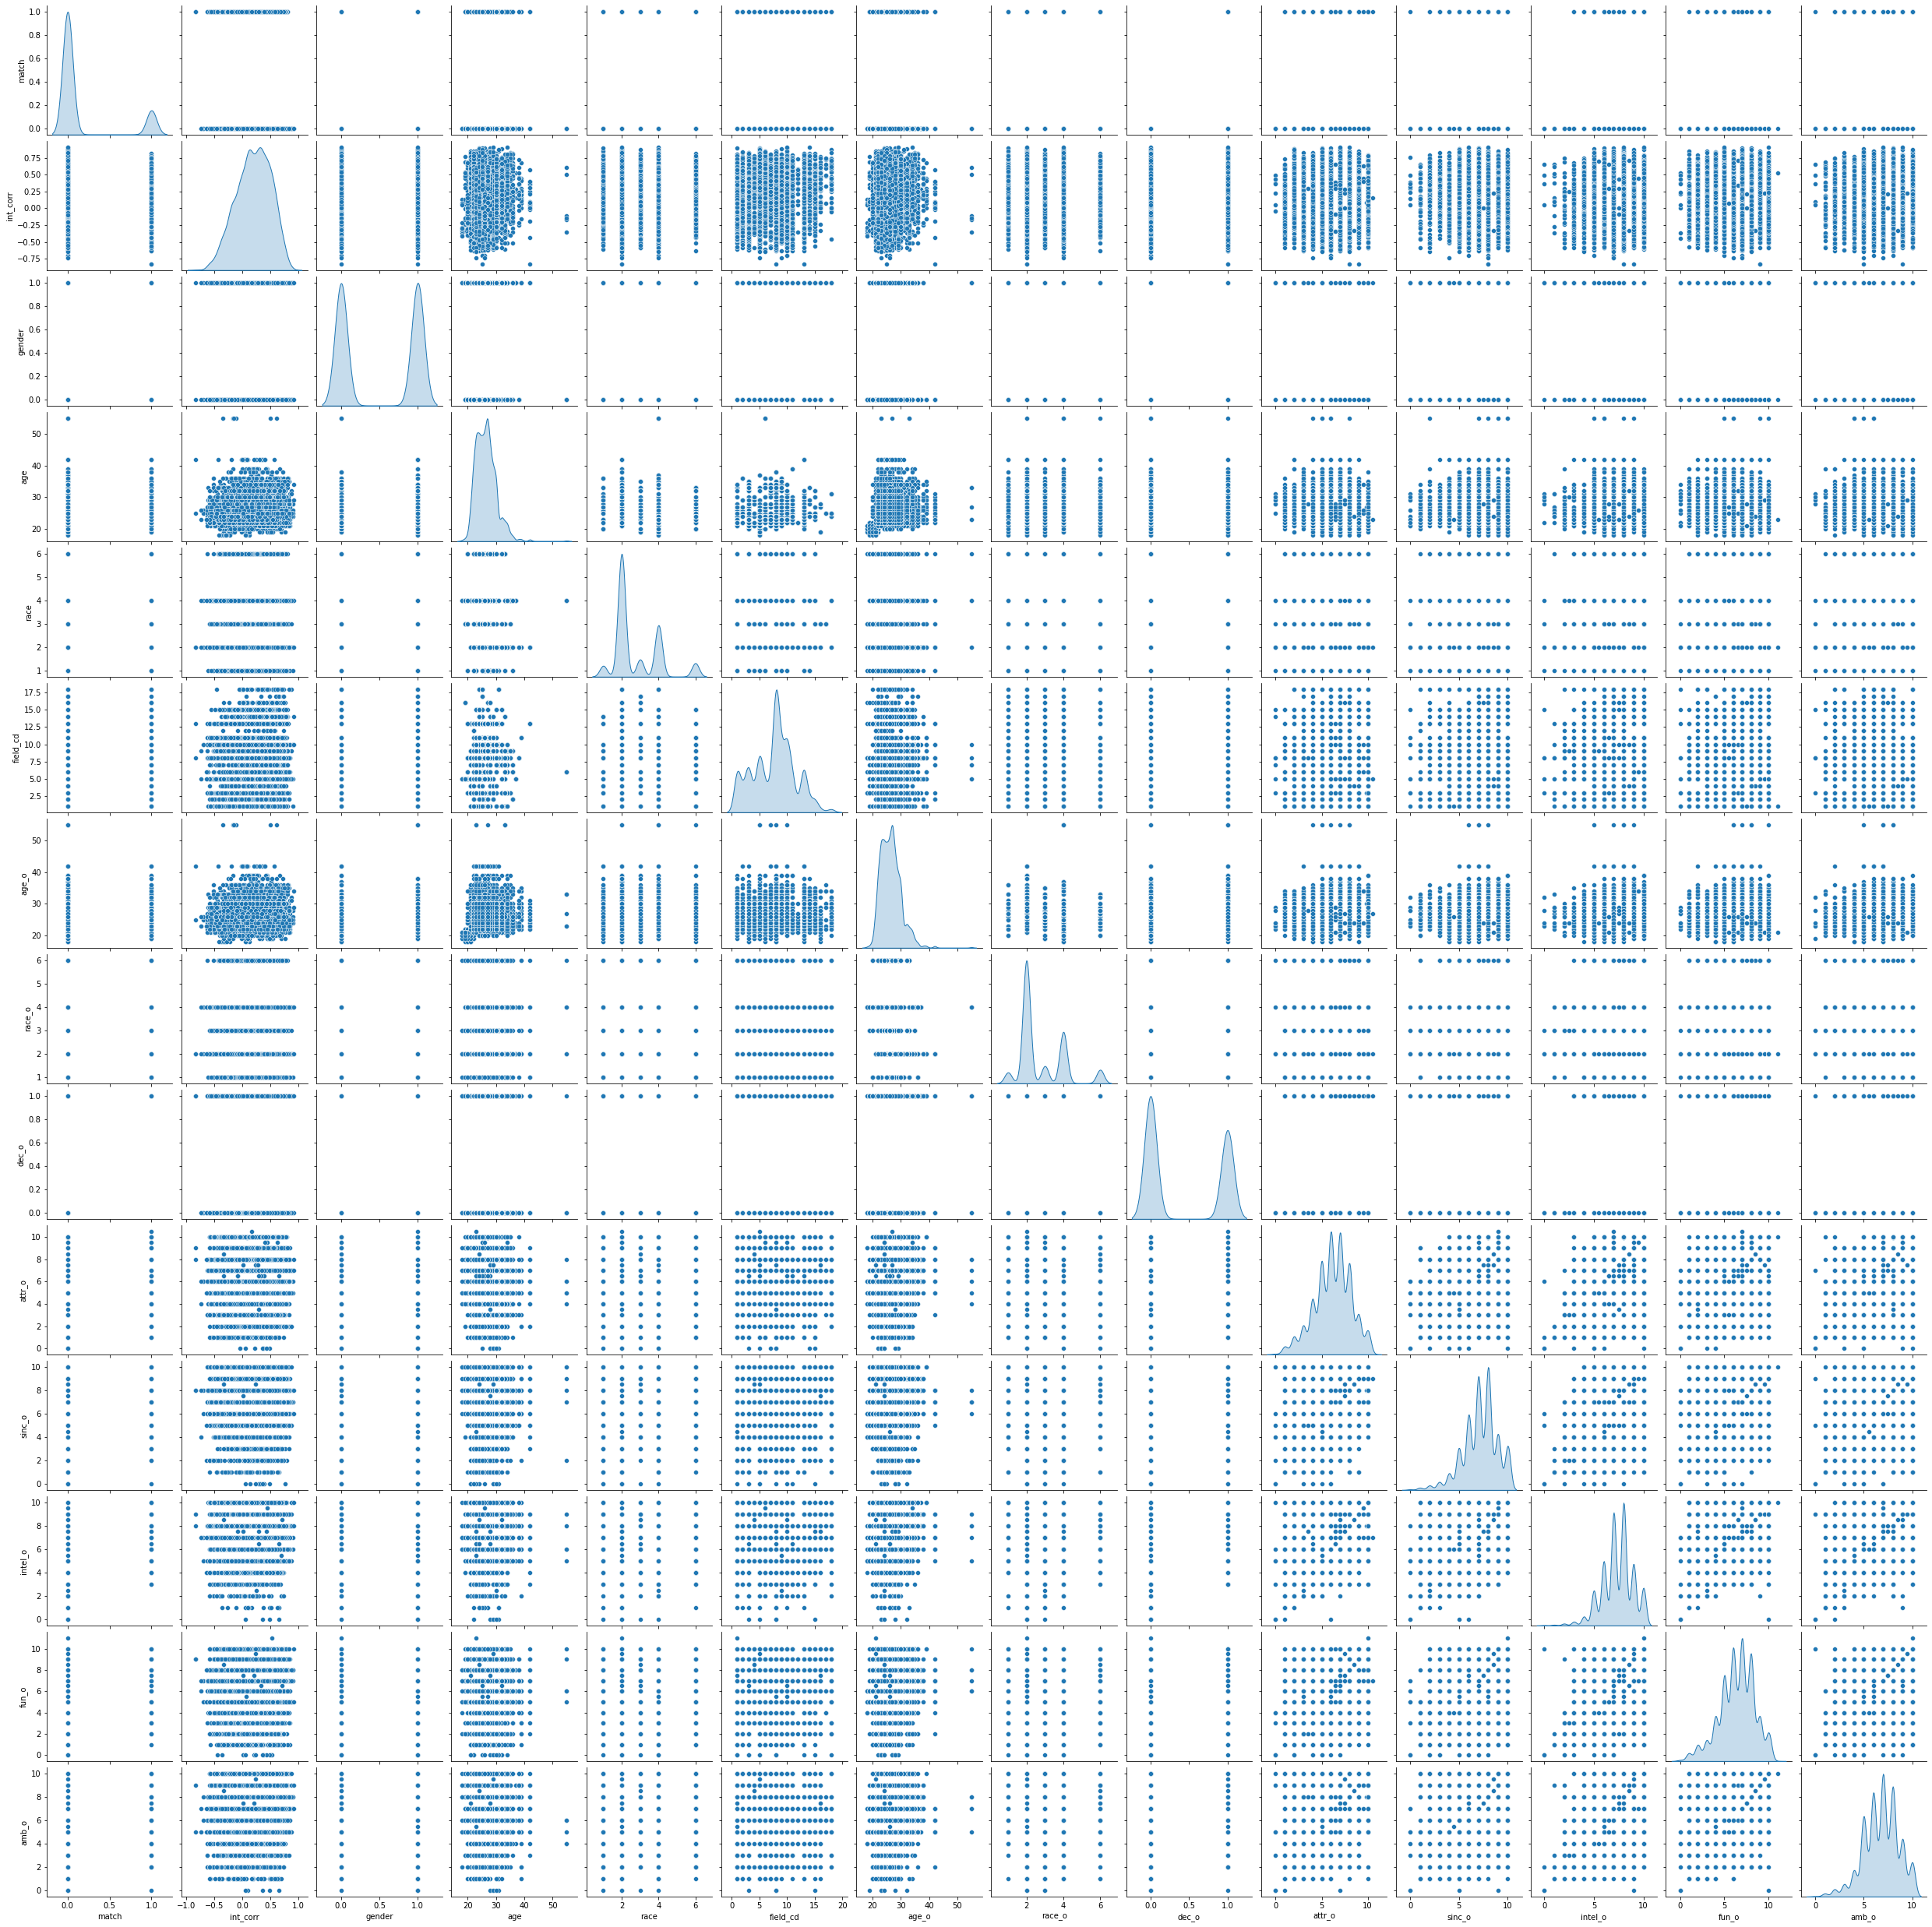

In [9]:
sns.pairplot(as_Selected,diag_kind='kde')

In [10]:
as_Selected.dtypes

match         int64
int_corr    float64
gender        int64
age         float64
race        float64
field_cd    float64
age_o       float64
race_o      float64
dec_o         int64
attr_o      float64
sinc_o      float64
intel_o     float64
fun_o       float64
amb_o       float64
dtype: object

In [11]:
#Clean up NAN values

as_Selected = as_Selected.dropna()

In [13]:
#Clean up NAN values

as_Selected.fillna(value=as_Selected['gender'].mean(), inplace=True)
as_Selected.fillna(value=as_Selected['age_o'].mean(), inplace=True)
as_Selected.fillna(value=as_Selected['race_o'].mean(), inplace=True)
as_Selected.fillna(value=as_Selected['dec_o'].mean(), inplace=True)
as_Selected.fillna(value=as_Selected['attr_o'].mean(), inplace=True)
as_Selected.fillna(value=as_Selected['sinc_o'].mean(), inplace=True)
as_Selected.fillna(value=as_Selected['fun_o'].mean(), inplace=True)
as_Selected.fillna(value=as_Selected['amb_o'].mean(), inplace=True)
as_Selected.fillna(value=as_Selected['age'].mean(), inplace=True)  
as_Selected.fillna(value=as_Selected['field_cd'].mean(), inplace=True) 
as_Selected.fillna(value=as_Selected['race'].mean(), inplace=True)  
as_Selected.fillna(value=as_Selected['match'].mean(), inplace=True)  
as_Selected.fillna(value=as_Selected['int_corr'].mean(), inplace=True)  


In [14]:
#Clean up NAN values

as_Selected.fillna(value=as_Selected['gender'].median(), inplace=True)
as_Selected.fillna(value=as_Selected['age_o'].median(), inplace=True)
as_Selected.fillna(value=as_Selected['race_o'].median(), inplace=True)
as_Selected.fillna(value=as_Selected['dec_o'].median(), inplace=True)
as_Selected.fillna(value=as_Selected['attr_o'].median(), inplace=True)
as_Selected.fillna(value=as_Selected['sinc_o'].median(), inplace=True)
as_Selected.fillna(value=as_Selected['fun_o'].median(), inplace=True)
as_Selected.fillna(value=as_Selected['amb_o'].median(), inplace=True)
as_Selected.fillna(value=as_Selected['age'].median(), inplace=True)  
as_Selected.fillna(value=as_Selected['field_cd'].median(), inplace=True) 
as_Selected.fillna(value=as_Selected['race'].median(), inplace=True)  
as_Selected.fillna(value=as_Selected['match'].median(), inplace=True)  
as_Selected.fillna(value=as_Selected['int_corr'].median(), inplace=True)  
  

In [15]:
# rename fields

rename_df= as_Selected.rename(columns={
                            'gender': 'Gender',
                            'age_o':  'PartnerAge',
                            'race_o': 'PartnerRace',
                            'dec_o':  'PartnerDecision',
                            'attr_o': 'PartnerAttractive',
                            'sinc_o': 'PartnerSincere',
                            'intel_o':'PartnerIntelligent',
                            'fun_o':  'PartnerFun',
                            'amb_o':  'PartnerAmbitious',
                            'age': 'SubjectAge',
                            'race': 'SubjectRace',
                            'field_cd':'Subject_FieldCD',
                            'match': 'Match',
                            'int_corr':'Interest Correlation'
                            
                           })
rename_df.head()

,Match,Interest Correlation,Gender,SubjectAge,SubjectRace,Subject_FieldCD,PartnerAge,PartnerRace,PartnerDecision,PartnerAttractive,PartnerSincere,PartnerIntelligent,PartnerFun,PartnerAmbitious
0,0,0.14,0,21.0,4.0,1.0,27.0,2.0,0,6.0,8.0,8.0,8.0,8.0
1,0,0.54,0,21.0,4.0,1.0,22.0,2.0,0,7.0,8.0,10.0,7.0,7.0
2,1,0.16,0,21.0,4.0,1.0,22.0,4.0,1,10.0,10.0,10.0,10.0,10.0
3,1,0.61,0,21.0,4.0,1.0,23.0,2.0,1,7.0,8.0,9.0,8.0,9.0
4,1,0.21,0,21.0,4.0,1.0,24.0,3.0,1,8.0,7.0,9.0,6.0,9.0


In [16]:
rename_df.shape

(7350, 14)

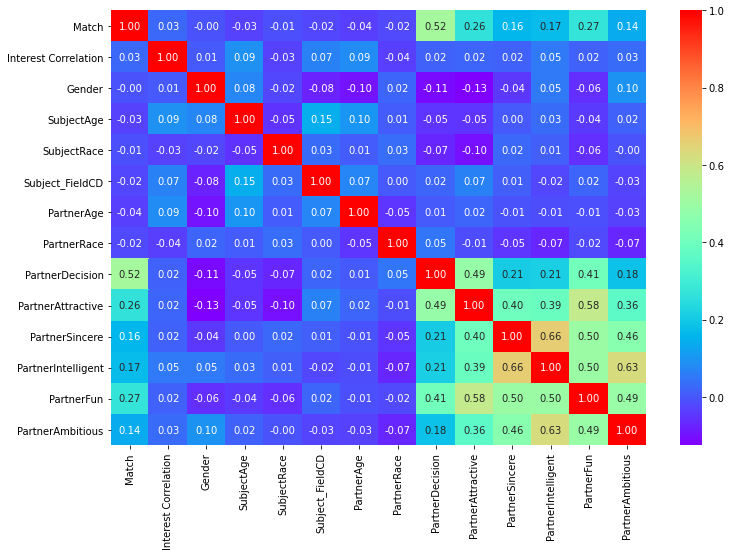

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(rename_df.corr(),annot=True,fmt='.2f',cmap='rainbow', )
plt.show()

In [18]:
# Set features. This will also be used as your x values.
X = rename_df.drop("Match", axis=1)
y = rename_df["Match"]
print(X.shape, y.shape)

(7350, 13) (7350,)


In [19]:
X = pd.get_dummies(X)

X

,Interest Correlation,Gender,SubjectAge,SubjectRace,Subject_FieldCD,PartnerAge,PartnerRace,PartnerDecision,PartnerAttractive,PartnerSincere,PartnerIntelligent,PartnerFun,PartnerAmbitious
0,0.14,0,21.0,4.0,1.0,27.0,2.0,0,6.0,8.0,8.0,8.0,8.0
1,0.54,0,21.0,4.0,1.0,22.0,2.0,0,7.0,8.0,10.0,7.0,7.0
2,0.16,0,21.0,4.0,1.0,22.0,4.0,1,10.0,10.0,10.0,10.0,10.0
3,0.61,0,21.0,4.0,1.0,23.0,2.0,1,7.0,8.0,9.0,8.0,9.0
4,0.21,0,21.0,4.0,1.0,24.0,3.0,1,8.0,7.0,9.0,6.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,0.64,1,25.0,2.0,18.0,26.0,3.0,1,10.0,5.0,3.0,2.0,6.0
8374,0.71,1,25.0,2.0,18.0,24.0,6.0,0,6.0,3.0,7.0,3.0,7.0
8375,-0.46,1,25.0,2.0,18.0,29.0,3.0,0,2.0,1.0,2.0,2.0,2.0
8376,0.62,1,25.0,2.0,18.0,22.0,4.0,1,5.0,7.0,5.0,5.0,3.0


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

In [22]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [23]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [24]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

# Create a Deep Learning Model


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [44]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=13))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

# default values
activation='relu' # or linear
dropout_rate=0.0 # or 0.2
init_mode='uniform'
weight_constraint=0 # or  4
optimizer='adam' # or SGD
lr = 0.01
momemntum=0
input_dim = X.shape[1]

# create model
model = Sequential()
model.add(Dense(100, 
                input_dim=input_dim, kernel_initializer=init_mode, 
                activation=activation
                ))
model.add(Dense(100, activation = activation))   
model.add(Dropout(dropout_rate)) 
model.add(Dense(2, kernel_initializer=init_mode, activation='sigmoid'))

TypeError: The added layer must be an instance of class Layer. Found: <keras.layers.core.Dense object at 0x0000016E61DB7C88>

In [27]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1400      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 11,702
Trainable params: 11,702
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=60,
    shuffle=True,
    verbose=2
)

Epoch 1/60
173/173 - 1s - loss: 0.3431 - accuracy: 0.8159
Epoch 2/60
173/173 - 0s - loss: 0.2893 - accuracy: 0.8262
Epoch 3/60
173/173 - 0s - loss: 0.2831 - accuracy: 0.8275
Epoch 4/60
173/173 - 0s - loss: 0.2814 - accuracy: 0.8322
Epoch 5/60
173/173 - 0s - loss: 0.2801 - accuracy: 0.8336
Epoch 6/60
173/173 - 0s - loss: 0.2784 - accuracy: 0.8362
Epoch 7/60
173/173 - 0s - loss: 0.2777 - accuracy: 0.8396
Epoch 8/60
173/173 - 0s - loss: 0.2767 - accuracy: 0.8403
Epoch 9/60
173/173 - 0s - loss: 0.2763 - accuracy: 0.8420
Epoch 10/60
173/173 - 0s - loss: 0.2747 - accuracy: 0.8420
Epoch 11/60
173/173 - 0s - loss: 0.2752 - accuracy: 0.8418
Epoch 12/60
173/173 - 0s - loss: 0.2761 - accuracy: 0.8393
Epoch 13/60
173/173 - 0s - loss: 0.2740 - accuracy: 0.8443
Epoch 14/60
173/173 - 0s - loss: 0.2747 - accuracy: 0.8409
Epoch 15/60
173/173 - 0s - loss: 0.2724 - accuracy: 0.8413
Epoch 16/60
173/173 - 0s - loss: 0.2735 - accuracy: 0.8409
Epoch 17/60
173/173 - 0s - loss: 0.2722 - accuracy: 0.8456
Epoch 

# Quantify our Trained Model

In [30]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

58/58 - 0s - loss: 0.2934 - accuracy: 0.8221
Normal Neural Network - Loss: 0.2934427261352539, Accuracy: 0.8220892548561096


# Make Predictions

In [31]:
encoded_predictions = model.predict_classes(X_test_scaled)
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [32]:
print(f"Predicted classes: {prediction_labels[:10]}")
print(f"Actual Labels: {list(y_test[:10])}")

Predicted classes: [0 0 0 1 1 0 0 0 0 0]
Actual Labels: [0, 0, 0, 1, 1, 0, 0, 0, 0, 0]


# Model Assessment

In [33]:
!pip install scikit-learn==0.21.2 --upgrade

In [38]:
# Use scikit-learn to grid search 
activation =  ['relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'] # softmax, softplus, softsign 
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
weight_constraint=[1, 2, 3, 4, 5]
neurons = [1, 5, 10, 15, 20, 25, 30]
init = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
optimizer = [ 'SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']


##############################################################
# grid search epochs, batch size
epochs = [1, 10] # add 50, 100, 150 etc
batch_size = [1000, 5000] # add 5, 10, 20, 40, 60, 80, 100 etc
param_grid = dict(epochs=epochs, batch_size=batch_size)


##############################################################
grid = GridSearchCV(model, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2, scoring='accuracy')


In [39]:
# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(X_train_scaled, y_train_categorical)

TypeError: Cannot clone object '<tensorflow.python.keras.engine.sequential.Sequential object at 0x0000016E602E7FD0>' (type <class 'tensorflow.python.keras.engine.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' methods.

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

In [ ]:
# Make predictions with the hypertuned model
grid_predictions = grid.predict(X_test_scaled)

In [ ]:
# Calculate classification report of GridSearch CV
from sklearn.metrics import classification_report
print(classification_report(y_test, grid_predictions,
                            target_names=["No ( 0 )", "Yes ( 1 )"]))

In [ ]:
# Calculate classification report of Neural Model 
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction_labels,
                            target_names=["No ( 0 )", "Yes ( 1 )"]))

# Save Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
randomForest_model= 'giangcao1.sav'
joblib.dump(randomForest_model, randomForest_model)